D:\Project\QuantStudio\QuantStudio\FactorDataBase\HDF5DB.py:66: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(self._FactorDB.MainDir+os.sep+self.Name+os.sep+ifactor_name+"."+self._Suffix) as ijFile:
D:\Project\QuantStudio\QuantStudio\FactorDataBase\HDF5DB.py:61: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(self._FactorDB.MainDir+os.sep+self.Name+os.sep+

==========历史回测==========
1. 初始化
耗时 : 3.66
2. 循环计算


100% (36 of 36) |########################| Elapsed Time: 0:00:05 Time:  0:00:05


耗时 : 5.73
3. 结果生成
耗时 : 0.30
总耗时 : 9.69



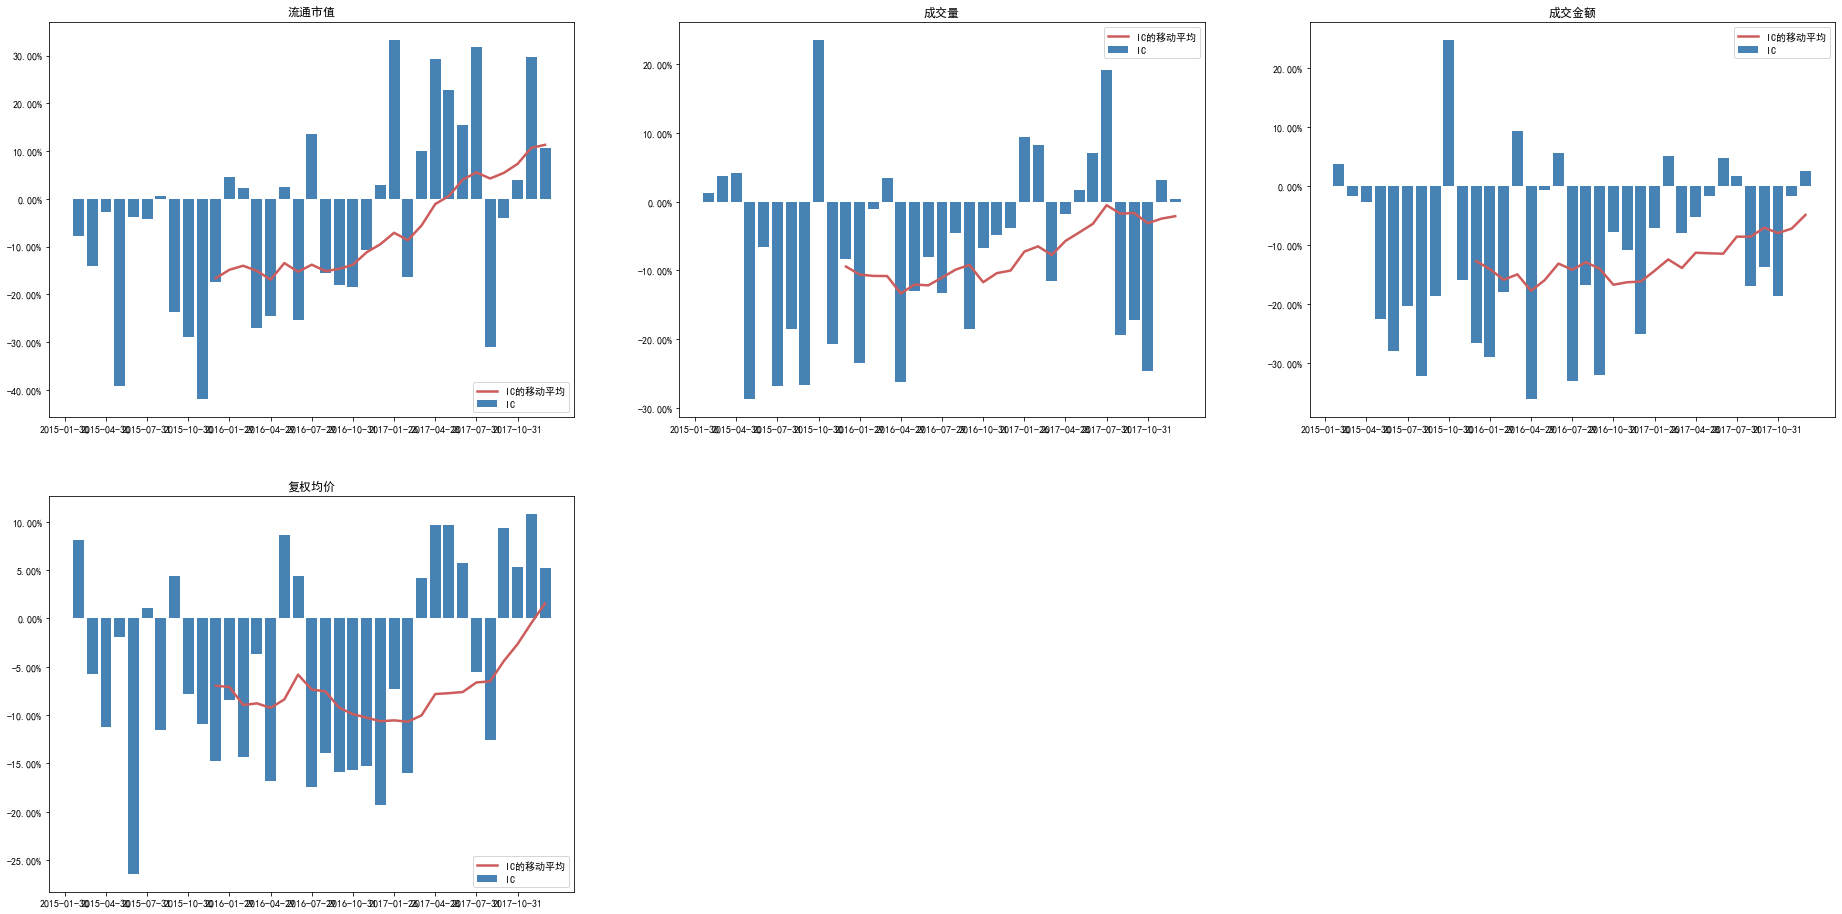
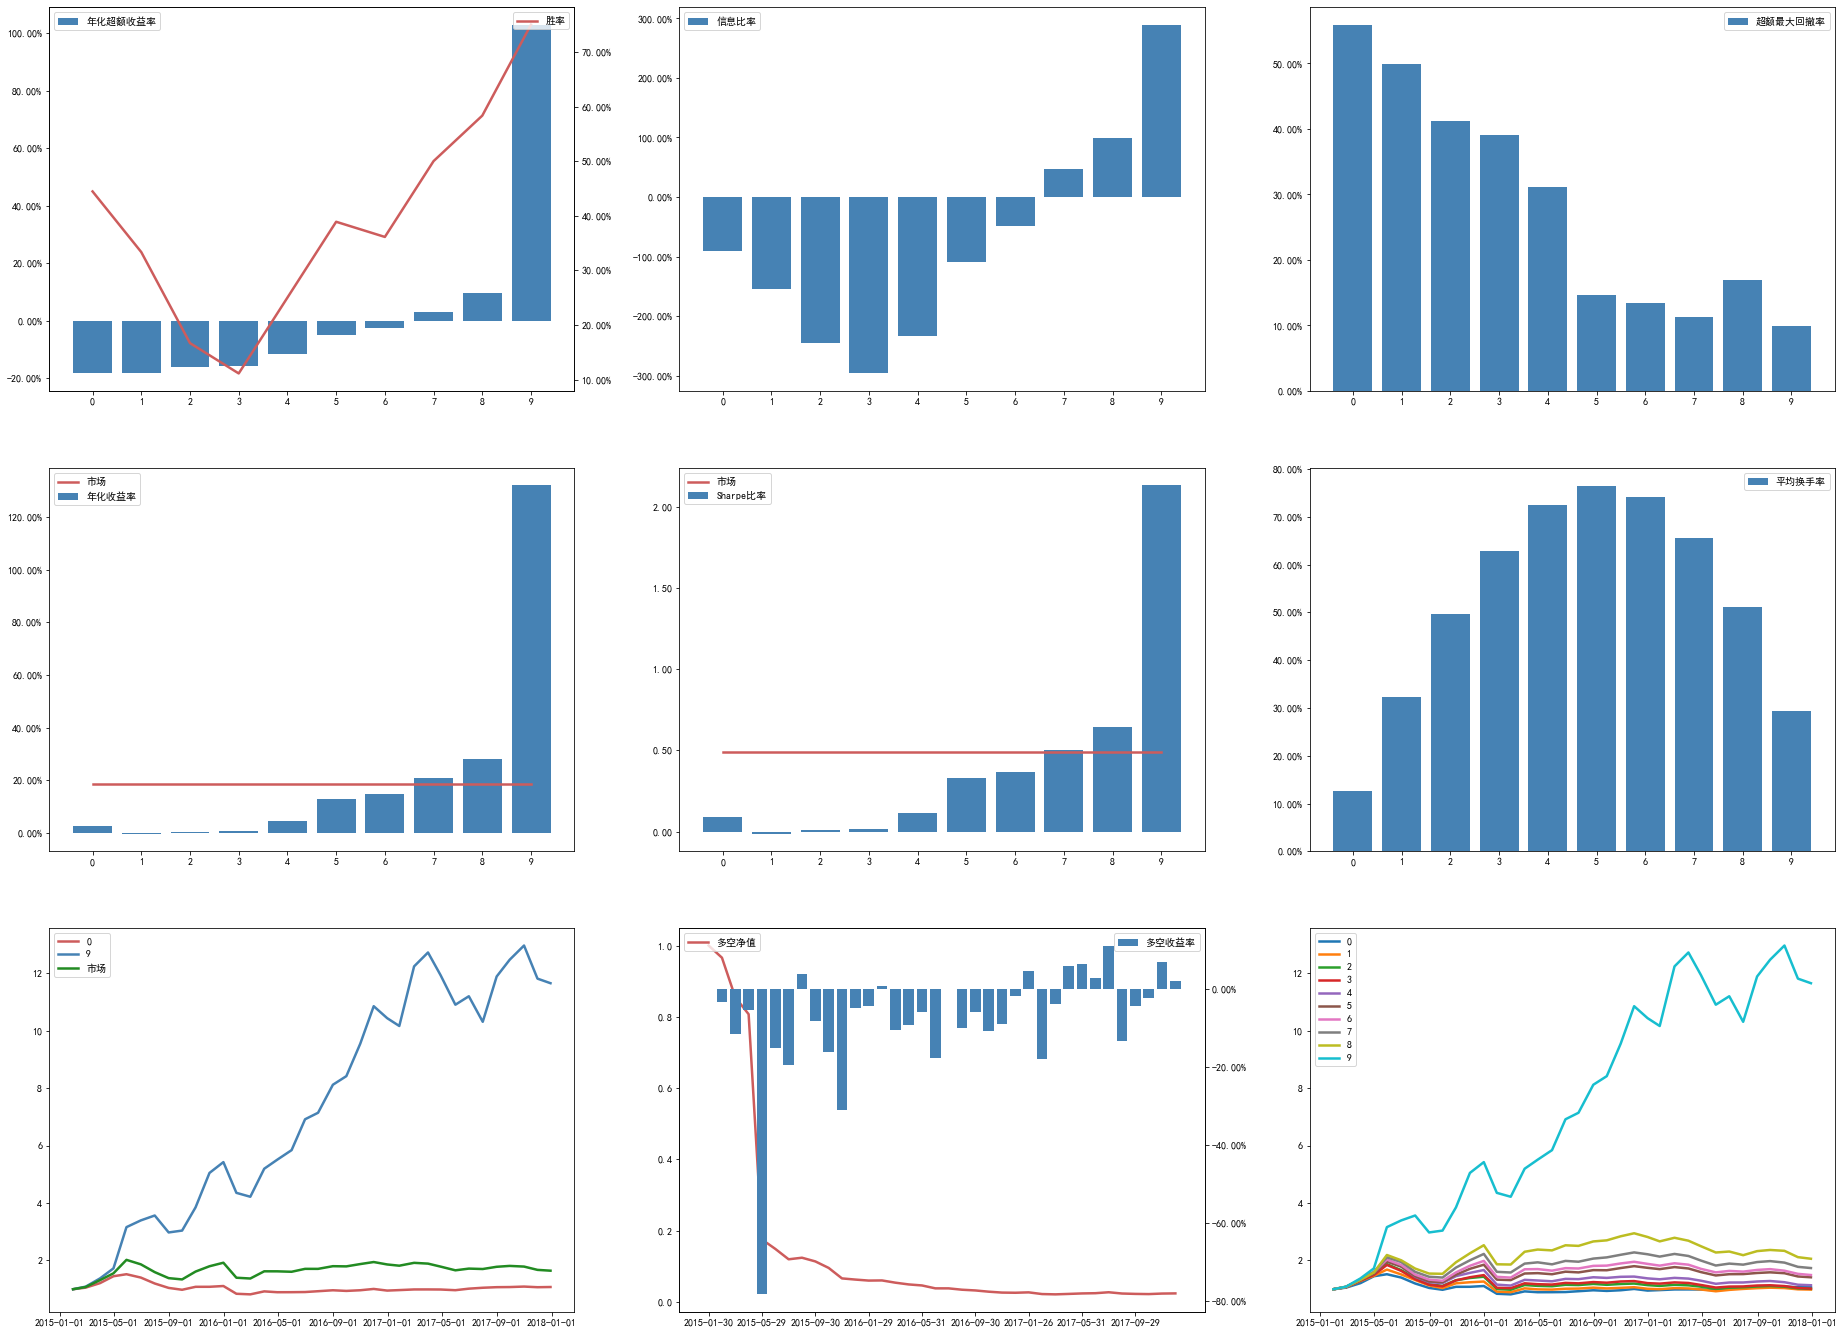

In [1]:
import datetime as dt

if __name__=='__main__':
    import QuantStudio.api as QS
    
    # 创建因子库
    HDB = QS.FactorDB.HDF5DB()
    HDB.connect()
    
    # 创建自定义因子表
    MainFT = QS.FactorDB.CustomFT("MainFT")
    FT = HDB.getTable("ElementaryFactor")
    DTs = FT.getDateTime(ifactor_name="复权收盘价", start_dt=dt.datetime(2015, 1, 1), end_dt=dt.datetime(2017, 12, 31))
    MonthLastDTs = QS.Tools.DateTime.getMonthLastDateTime(DTs)
    MainFT.addFactors(factor_table=FT, factor_names=["复权收盘价", "流通市值", "成交金额", "复权均价", "成交量", "Wind行业"], args={})
    MainFT.setDateTime(MonthLastDTs)
    MainFT.setID(FT.getID(ifactor_name="复权收盘价"))
    
    # 创建回测模型
    Model = QS.BackTest.BackTestModel()
    # --------因子测试模块--------
    # IC 测试
    iModule = QS.BackTest.SectionFactor.IC(factor_table=MainFT)
    iModule["测试因子"] = ["流通市值", "成交量", "成交金额", "复权均价"]
    iModule["价格因子"] = "复权收盘价"
    iModule["计算时点"] = MonthLastDTs
    Model.Modules.append(iModule)
    
    # 分位数组合测试
    iModule = QS.BackTest.SectionFactor.QuantilePortfolio(factor_table=MainFT)# IC 测试
    iModule["测试因子"] = "流通市值"
    iModule["价格因子"] = "复权收盘价"
    iModule["调仓时点"] = MonthLastDTs
    Model.Modules.append(iModule)
    
    # 运行模型
    TestDateTimes = MainFT.getDateTime()
    Model.run(dts=TestDateTimes)
    
    display(Model)